<a href="https://colab.research.google.com/github/isabelg-arcia/Bootcamp_exercises/blob/main/An%C3%A1lise%20com%20probabilidade%20e%20Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ## graficos
import seaborn as sns ## graficos
from scipy.stats import skewnorm ## Gerar distribuicoes assim√©tricas, etc (utilizado na montagem do dataset)
from google.colab import drive ## conectar com o google drive para ler seus arquivos
from scipy.stats import norm


coluna pr√©-pandemia, consumidores_df; 
* 1 = sim
* 0 = n√£o

In [ ]:
sim_nao = {0:'pos', 1:'pre'}

Dataset Import

In [ ]:
consumidores_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/desafio01consumidor-230209-164413.csv')

estoque_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/desafio_02_estoque-230209-164413.csv')

# Desafio 1: Entendendo o consumidor.

Contexto :

Suponha que voc√™ trabalha em uma empresa de produtos de beleza populares e, com a pandemia, voc√™ suspeita que o perfil de seus clientes mudou. O time de marketing, pediu a sua ajuda e gostaria de entender se 1. isso de fato aconteceu e 2. quais as diferen√ßas do novo perfil de clientes para o antigo, pois assim poderiam personalizar melhor os seus an√∫ncios. Para isso, eles te enviaram a base de dados (desafio_01_consumidor.csv). Como voc√™ poderia ajud√°-los?

Para responder esse desafio: A base de dados: desafio_01_consumidor.csv cont√©m informa√ß√µes de seus clientes (anonimizados) no per√≠odo pr√© e p√≥s pandemia. A coluna "pr√©-pandemia" indica se o dado √© pr√©-pandemia ou n√£o, sendo 1, caso positivo ou 0 caso negativo.

#### 1. Entenda a distribui√ß√£o de vari√°veis como de idade / renda / regiao /
produtos mais comprados antes e depois da pandemia
* a. Identifique as distribui√ß√µes
* b. Plote histogramas / boxplots

In [ ]:
consumidores_df.head()

id_cliente  idade  renda      produto     regiao-BR  pre-pandemia
0  XXXXXXX72     30   7452        batom       Sudeste             1
1  XXXXXXX15     59    837  desodorante      Nordeste             1
2  XXXXXXX70     28   3231       sombra  Centro-Oeste             1
3  XXXXXXX99     27   5409        batom           Sul             1
4  XXXXXXX98     24   1142        batom       Sudeste             1

In [ ]:
# Alterando nomes de colunas e valores:
consumidores_df = consumidores_df.rename(columns = {"pre-pandemia":"pre_pandemia","regiao-BR": "regiao"} )

consumidores_df.pre_pandemia = consumidores_df.pre_pandemia.map(sim_nao)

In [ ]:
consumidores_df.head()

id_cliente  idade  renda      produto        regiao pre_pandemia
0  XXXXXXX72     30   7452        batom       Sudeste          pre
1  XXXXXXX15     59    837  desodorante      Nordeste          pre
2  XXXXXXX70     28   3231       sombra  Centro-Oeste          pre
3  XXXXXXX99     27   5409        batom           Sul          pre
4  XXXXXXX98     24   1142        batom       Sudeste          pre

Analizando a renda antes e depois da pandemia

In [ ]:
### Quantos data points existem no pr√© vs no p√≥s pandemia:
consumidores_df["pre_pandemia"].value_counts() 

pos    102
pre    101
Name: pre_pandemia, dtype: int64

In [ ]:
renda_pre_e_pos = consumidores_df.groupby('pre_pandemia')['renda'].sum()
renda_pre_e_pos # As vendas aumentaram no per√≠odo p√≥s pandemia

pre_pandemia
pos    1424787
pre     927245
Name: renda, dtype: int64

Text(0.5, 1.0, 'Histograma comparativo da distribui√ßao de renda pr√© x p√≥s pandemia')

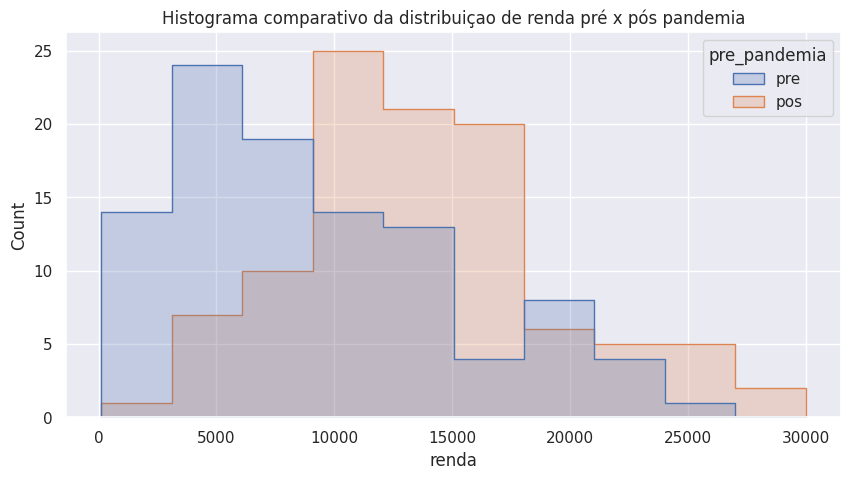

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=consumidores_df, x="renda", hue="pre_pandemia",  element="step").set_title("Histograma comparativo da distribui√ßao de renda pr√© x p√≥s pandemia")

podemos perceber olhando o histograma comparativo que a distribuicao no pr√© pandemia era assim√©trica positiva, enquanto que no p√≥s pandemia, tornou-se sim√©trica. Isso nos d√° um possivel indicio de uma possivel correlacao entre idade e renda.

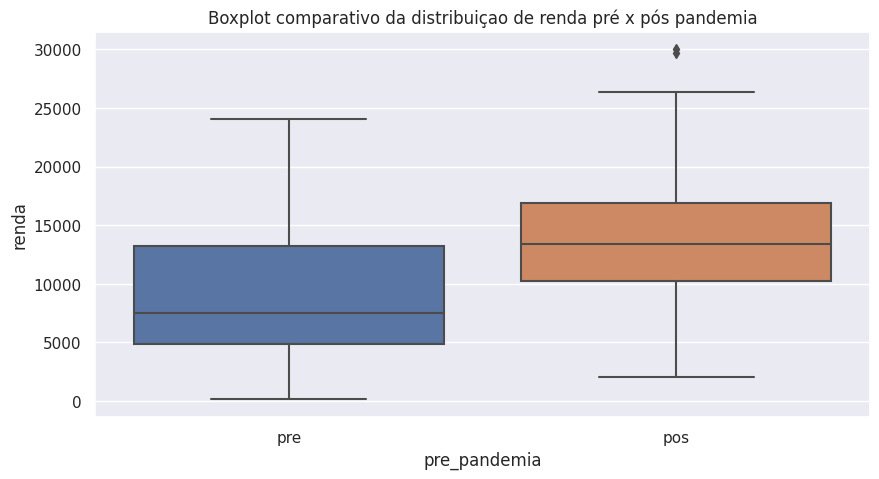

In [ ]:
ax = sns.boxplot(x="pre_pandemia", y="renda", data=consumidores_df).set_title("Boxplot comparativo da distribui√ßao de renda pr√© x p√≥s pandemia")

No pr√© pandemia, podemos ver que a renda mediana era mais concentrada em faixas de 5000 a 7000 reais, no p√≥s pandemia, a renda est√° bem mais alta. O que poderia ser consequencia de um redirecionamento da marca para produtos mais luxuosos ou mais caros

Produtos mais comprados antes e depois da pandemia

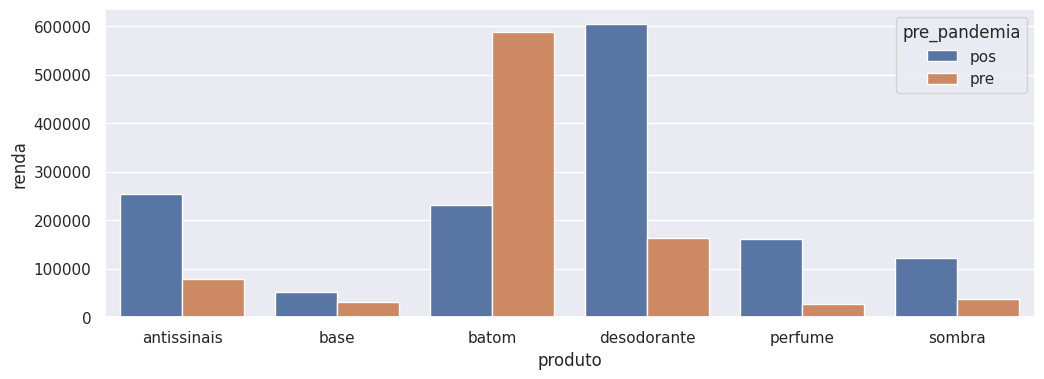

In [ ]:
vendas_p_produtos = consumidores_df.groupby(['produto','pre_pandemia'])['renda'].sum().reset_index()
#Plotando gr√°fico de compara√ß√£o de vendas antes e depois da pandemia, por produto:
ax = sns.barplot(x="produto", y="renda", data=vendas_p_produtos, hue="pre_pandemia")
ax.figure.set_size_inches(12, 4)

Perfil de idade dos consumidores antes e depois da pandemia

<Axes: title={'center': 'Idade antes e depois'}, xlabel='idade', ylabel='pre_pandemia'>

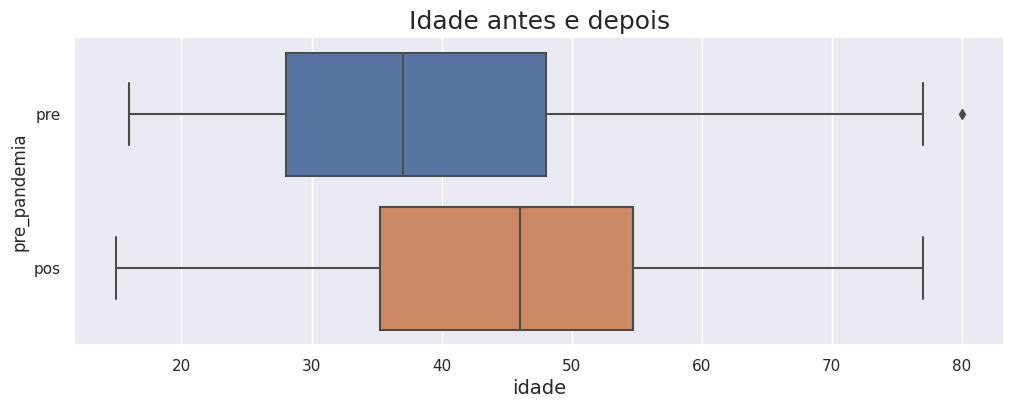

In [ ]:
ax = sns.boxplot(x = 'idade', y = 'pre_pandemia', data = consumidores_df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Idade antes e depois', fontsize=18)
ax.set_xlabel('idade', fontsize=14)
ax

Perfil de consumidores por regi√£o:

In [ ]:
pos_pandemia = consumidores_df.query('pre_pandemia == "pos"')

In [ ]:
vendas_p_regiao = pos_pandemia.groupby(['regiao','produto'])['renda'].sum().reset_index()
#Plotando gr√°fico de compara√ß√£o de vendas antes e depois da pandemia, por produto:

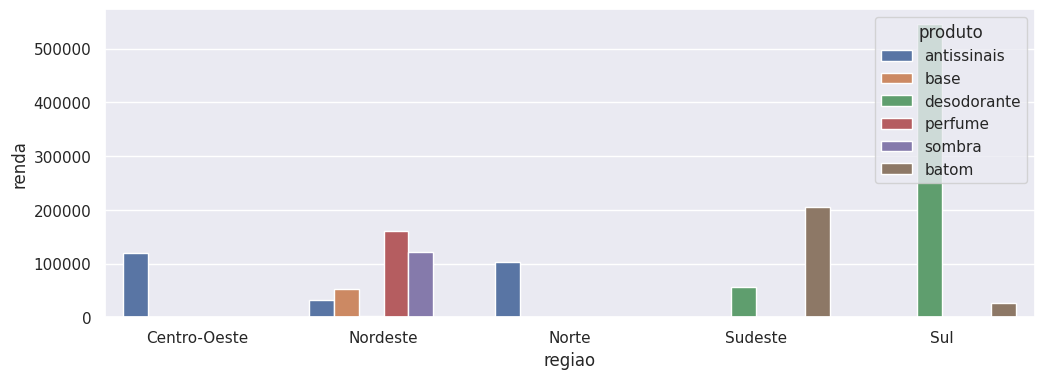

In [ ]:
ax = sns.barplot(x="regiao", y="renda", data=vendas_p_regiao, hue="produto")
ax.figure.set_size_inches(12, 4)

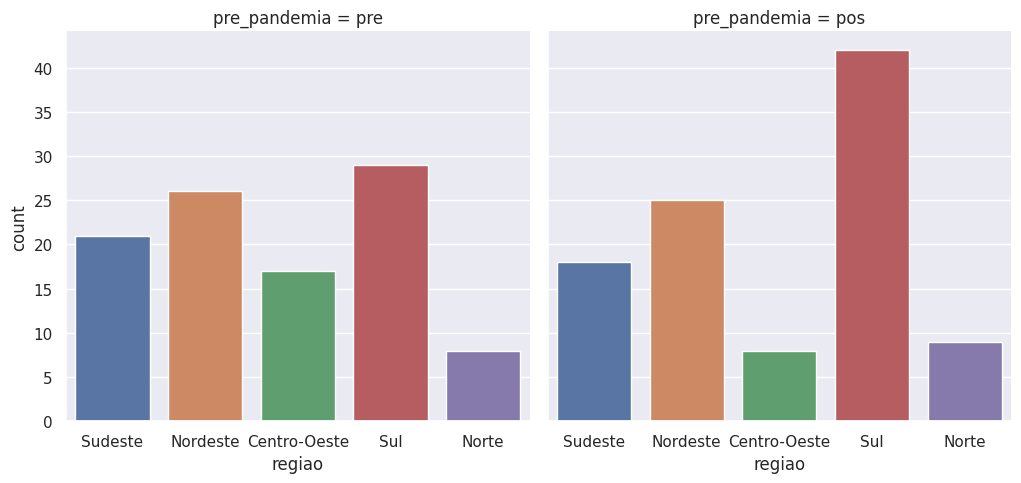

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="regiao", col="pre_pandemia", col_wrap=4,
                data=consumidores_df,
                kind="count")

Pelo gr√°fico, conseguimos ver que a propor√ß√£o de clientes entre as regioes mudou bastante do pre x pos pandemia. No pre pandemia tinhamos uma distribuicao mais mixta entre as regioes, exceto o norte. No pos pandemia, tivemos uma diminuicao na proporcao de clientes do centro oeste.

Produto

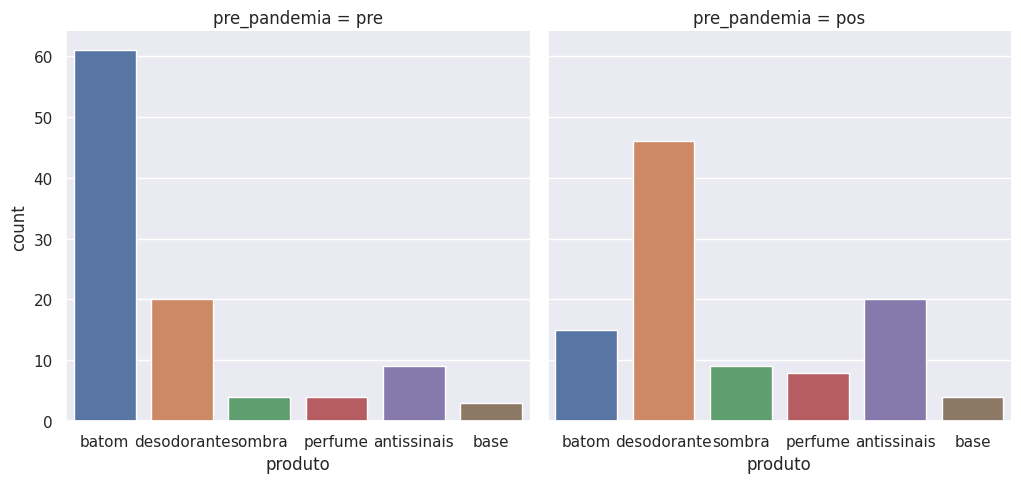

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.catplot(x="produto", col="pre_pandemia", col_wrap=4,
                data=consumidores_df,
                kind="count")

In [ ]:
df_perc_regiao = pd.DataFrame(
    {'Count_pre-pandemia': pd.value_counts(consumidores_df.loc[consumidores_df["pre_pandemia"]=='pre']['regiao']) , 
     'Porcentagem_pre-pandemia':pd.value_counts(consumidores_df.loc[consumidores_df["pre_pandemia"]=='pre']['regiao'], normalize = True)*100,
     'Count_pos-pandemia': pd.value_counts(consumidores_df.loc[consumidores_df["pre_pandemia"]=='pos']['regiao']) , 
     'Porcentagem_pos-pandemia':pd.value_counts(consumidores_df.loc[consumidores_df["pre_pandemia"]=='pos']['regiao'], normalize = True)*100 
     }
     )
df_perc_regiao

Count_pre-pandemia  Porcentagem_pre-pandemia  \
Centro-Oeste                  17                 16.831683   
Nordeste                      26                 25.742574   
Norte                          8                  7.920792   
Sudeste                       21                 20.792079   
Sul                           29                 28.712871   

              Count_pos-pandemia  Porcentagem_pos-pandemia  
Centro-Oeste                   8                  7.843137  
Nordeste                      25                 24.509804  
Norte                          9                  8.823529  
Sudeste                       18                 17.647059  
Sul                           42                 41.176471

#### 2. Voc√™ notou diferen√ßas n√≠tidas pr√© e p√≥s pandemia? Como voc√™ poderia
provar estatisticamente que essas diferen√ßas s√£o significativas ? (pergunta
extra)

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'renda'}>]], dtype=object)

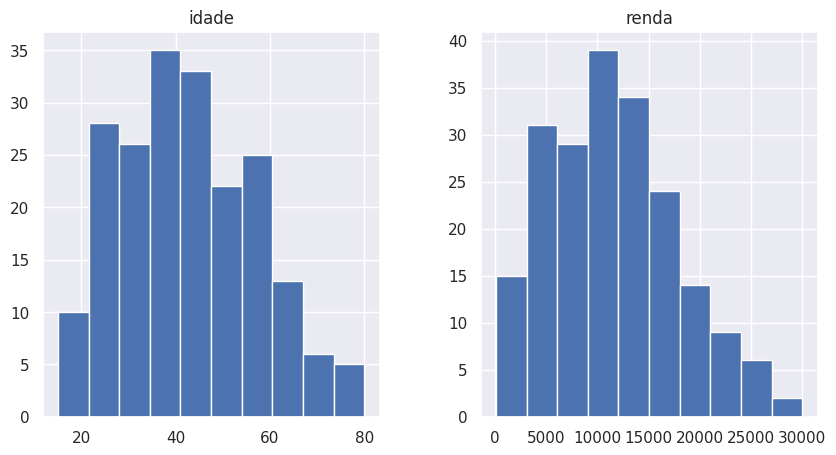

In [ ]:
consumidores_df.hist()

Para provar que duas distribui√ß√µes sao diferentes, ou que a distribui√ß√£o dos dados podemos utilizar testes de hip√≥teses!

O teste t ve a diferenca entre m√©dias, mas assume que a distribui√ß√°o dos dados √© normal, sendo o caso atual.


* *Teste t como funciona?*

Nese caso a hipotese do teste √© de que a m√©dia da distribuicao 1 = m√©dia da distribuicao 2.

Conforme ja dito, pressupoe que os dados tenham distribuicao normal! e que a variancia populacional (nao da amostra) seja a mesma.


In [ ]:
from scipy import stats

In [ ]:
renda_pre = consumidores_df.loc[consumidores_df["pre_pandemia"]=='pre']["renda"]
renda_pos = consumidores_df.loc[consumidores_df["pre_pandemia"]=='pos']["renda"]
stats.ttest_ind(renda_pre, renda_pos)

Ttest_indResult(statistic=-5.8539120969193865, pvalue=1.9295804375445438e-08)

Conclusao: As duas distribuicoes, tem m√©dias diferentes

#### 3. Suponha agora que os dados recebidos s√£o somente uma amostra da sua popula√ß√£o total de clientes. Suponha que a sua "popula√ß√£o" de clientes verdadeira √© de 100000. Qual o tamanho da amostra necess√°ria para chegarmos a conclus√µes com 95% de confian√ßa e 2% de margem de erro? A base informada √© suficiente? E com uma margem de erro de 10%?

F√≥rmula para o c√°lculo do tamanho da amostra, considerando a tabela de distribuicao normal e nivel de confianca, como por exemplo a f√≥rmula:

### $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

sendo:
- s o desvio padrao da variavel que queremos analisar
- z o score da distribuicao normal

In [ ]:
N = 100000
z = norm.ppf((0.5 + (0.95 / 2)))
s = consumidores_df["idade"].std() #Desvio padr√£o amostral
e  = 0.02  #erro inferencial

In [ ]:
def calcular_tamanho_amostra_n(N,z,s,e):
  return round(((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1))))

resultado = calcular_tamanho_amostra_n(N,z,s,e)
resultado

95219

# Desafio 2: Determinando o Estoque de Seguran√ßa.


Contexto : 

Repassando a f√≥rmula M√£e do estoque de seguranca:

- O estoque de seguran√ßa pela f√≥rmula abaixo vai depender essencialmente de:
  - lead time m√©dio em dias
  - variabilidade do lead time
  - variabilidade da demanda
  - demanda m√©dia (EM DIAS)

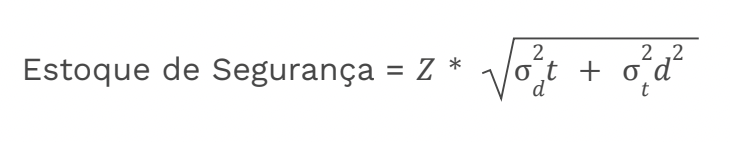


### 1. Analise os dados das vendas e do lead time. Eles seguem uma distribui√ß√£o normal? Que caracter√≠sticas voc√™ identificou para chegar a essa conclus√£o?

In [ ]:
estoque_df.head()

data  vendas-iogurte  lead-time
0  2015-01-04            5083          4
1  2015-01-11            4936          3
2  2015-01-18            5051          6
3  2015-01-25            4846          4
4  2015-02-01            5003          5

In [ ]:
estoque_df['data'] = pd.to_datetime(estoque_df['data'])

In [ ]:
print(f"O per√≠odo de vendas analisado vai de {estoque_df['data'].min()} √† {estoque_df['data'].max()}")

O per√≠odo de vendas analisado vai de 2015-01-04 00:00:00 √† 2022-01-30 00:00:00


In [ ]:
estoque_df.describe().round(2)

vendas-iogurte  lead-time
count          370.00     370.00
mean          4999.17       5.09
std             77.29       1.58
min           4811.00       1.00
25%           4947.00       4.00
50%           4996.00       5.00
75%           5054.00       6.00
max           5233.00       9.00

A distribui√ß√£o normal √© uma das mais utilizadas em estat√≠stica. √â uma distribui√ß√£o cont√≠nua, onde a distribui√ß√£o de frequ√™ncias de uma vari√°vel quantitativa apresenta a forma de sino e √© sim√©trica em rela√ß√£o a sua m√©dia.
Primeiro vamos plotar e analisar se parece uma distribui√ß√£o normal as vendas semanais do dataset

Text(0.5, 1.0, 'Distribuicao das vendas semanais de iogurte')

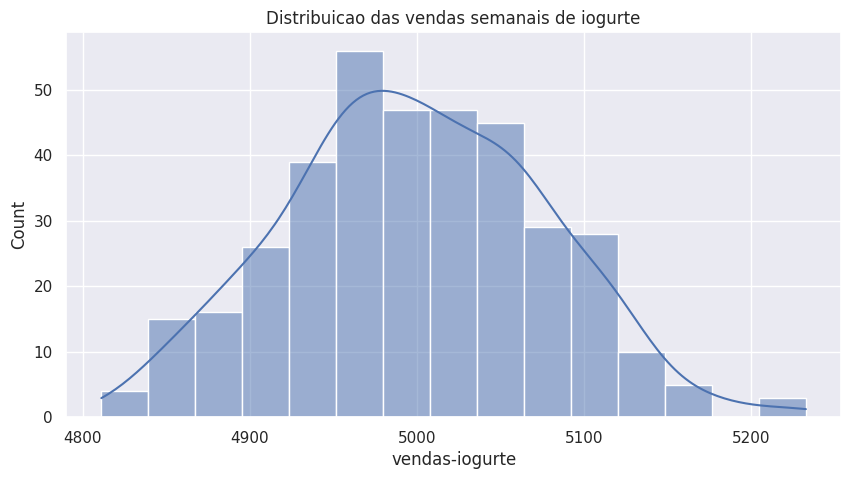

In [ ]:
### PLOT DAS VENDAS
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=estoque_df, x="vendas-iogurte", kde=True).set_title("Distribuicao das vendas semanais de iogurte")

In [ ]:
estoque_df['lead-time'].shape[0]

370

In [ ]:
estoque_df['lead-time'].count()

370

In [ ]:
media_leadtime = estoque_df['lead-time'].mean()
desviop_leadtime = estoque_df['lead-time'].std()
print("M√©dia: {} ".format(media_leadtime))
print("Desvio Padrao: {} ".format(desviop_leadtime))

M√©dia: 5.094594594594595 
Desvio Padrao: 1.5787281673958213 


Visualmente os dados parecem seguir uma distribuicao normal com m√©dia em torno de 500 e desvio padrao 77.3

Ainda na pr√© analise podemos refetir. Ser√° que essa distibuicao pode ter mudado com o tempo? Vamos garantir primeiro que isso nao aconteceu

In [ ]:
estoque_df["data"]= pd.to_datetime(estoque_df["data"], format = "%Y-%m-%d")

Text(0.5, 1.0, 'Vendas semanais de iogurte ao longo do tempo')

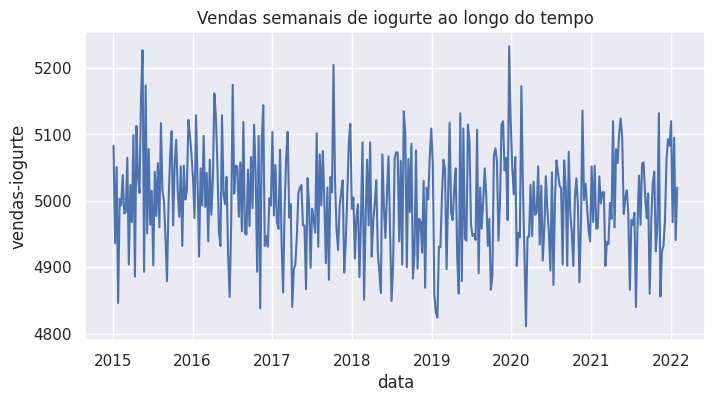

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
sns.lineplot(data=estoque_df, x="data", y="vendas-iogurte").set_title("Vendas semanais de iogurte ao longo do tempo")

Os dados n√£o parecem ter uma tendencia. Estao bem flutuando ao redor da m√©dia, o que chamamos de s√©rie est√°cion√°ria. A volatilidade parece alta tamb√©m, visto que estamos com granularidade semanal

#### An√°lise via QQ-plot
Tem por objetivo comparar os quantis da distribuicao normal teorica com o da distribuicao dos seus dados.

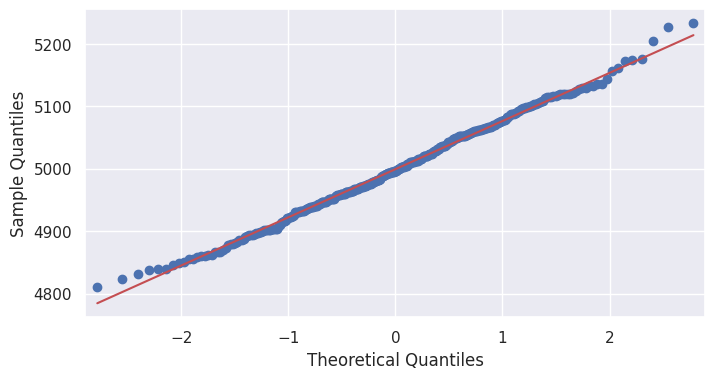

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(estoque_df['vendas-iogurte'], line='s')
plt.show();

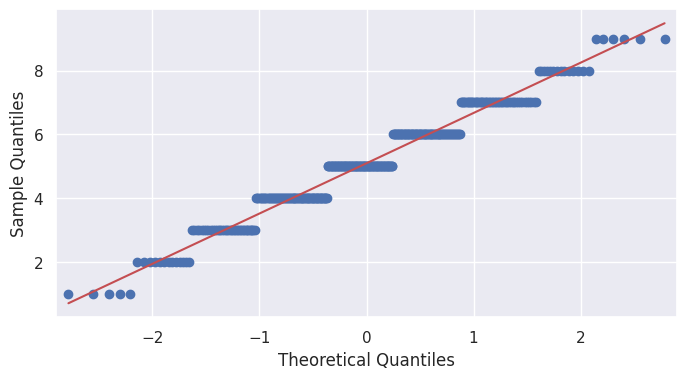

In [ ]:
qqplot(estoque_df['lead-time'], line ='s')
plt.show();

Conclus√£o: Analisando vizualmente via histograma e qqplots podemos perceber que a distribuicao do lead-time e a as vendas de iogurte seguem uma distribuicao normal.

### 2. Assuma que:
* a. Os dados seguem uma distribui√ß√£o normal.
* b. O time de vendas utilize para o produto em quest√£o o n√≠vel de servi√ßo
de 99,87%
* c. O produto n√£o tem sazonalidade (todos os meses vende valores
pr√≥ximos) e a demanda m√©dia passada √© uma boa estimativa para a
projetada, de acordo com o time de planejamento de demanda.
#####Calcule, com os dados fornecidos, o estoque de seguran√ßa desejado.

Estoque de Seguran√ßa = ùëç * ‚àöœÉùëë^2 * ùë°

* t = lead time m√©dio.
* œÉ = desvio padr√£o / varia√ß√£o da demanda

In [ ]:
sigma_d = estoque_df["vendas-iogurte"].std()
sigma_t = (estoque_df["lead-time"]/7).std() ## deve ser convertido por semana, pois os dados da demanda sao semanais
t = (estoque_df["lead-time"]/7).mean() ## deve ser convertido por semana,..
d = estoque_df["vendas-iogurte"].mean()
import scipy.stats as st
Z = st.norm.ppf(.9987)

In [ ]:
import math
def calcula_estoque_seguranca(Z, sigma_d, t, sigma_t, d):
  return math.ceil(Z*((sigma_d**2)*t + (sigma_t**2)*(d**2))**(1/2))

In [ ]:
### adicionando o componente de risco presente na formula (desvio padrao + o lead time) chegamos ao valor correto de:
resposta = calcula_estoque_seguranca(Z, sigma_d, t, sigma_t, d)

print(f"O estoque de seguran√ßa adequado √© de : {resposta} produtos")

O estoque de seguran√ßa adequado √© de : 3402 produtos


O valor informado, pode parecer alto, mas considerando que temos um lead time m√©dio de 5 dias e a entrega √© feita em menos de 1 semana ele faz sentido, √© aproximadamente (5/7)*5000.